In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans


In [17]:
df = pd.read_csv (r"D:\Downloads\Mall_Project\Mall_Customers.csv")

In [18]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [71]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,2.29000,3.145000
std,57.879185,13.969007,26.264721,25.823522,1.83377,2.146395
min,1.000000,18.000000,15.000000,1.000000,0.00000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.00000,1.750000
50%,100.500000,36.000000,61.500000,50.000000,2.00000,3.000000
75%,150.250000,49.000000,78.000000,73.000000,4.00000,5.000000
max,200.000000,70.000000,137.000000,99.000000,5.00000,7.000000


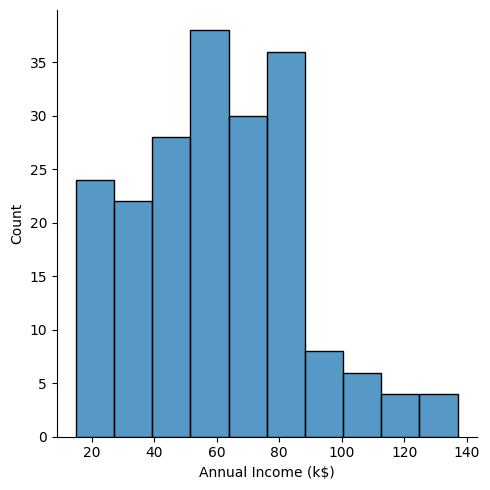

In [72]:
sns.displot(df['Annual Income (k$)'])

In [73]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

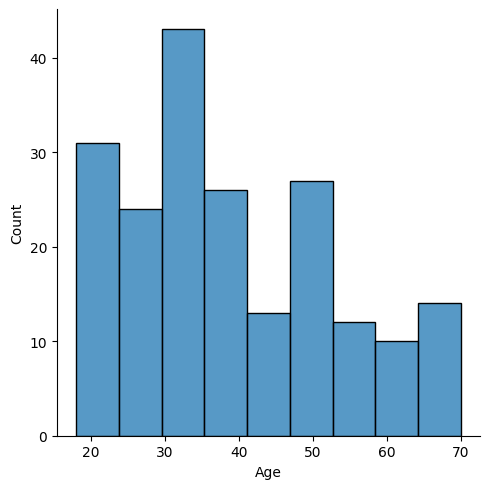

<Figure size 640x480 with 0 Axes>

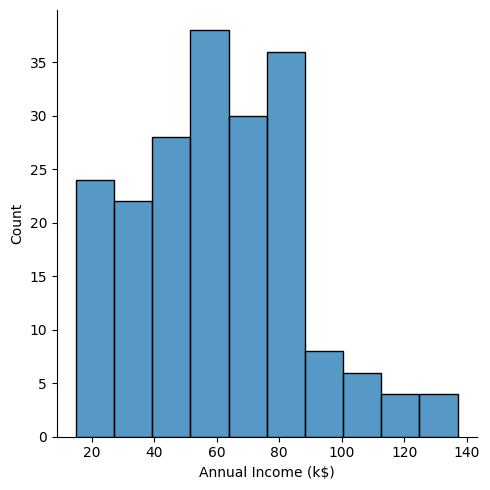

<Figure size 640x480 with 0 Axes>

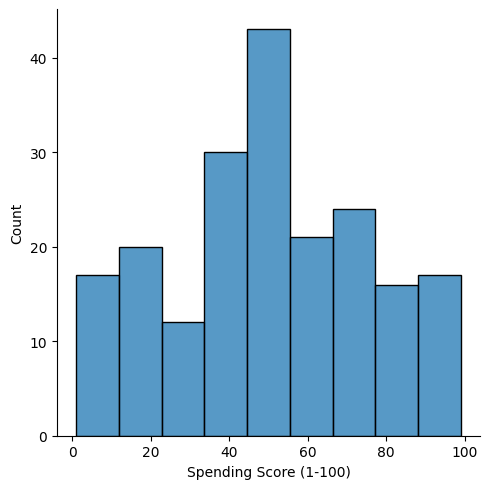

In [74]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    pyplot.figure()
    sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

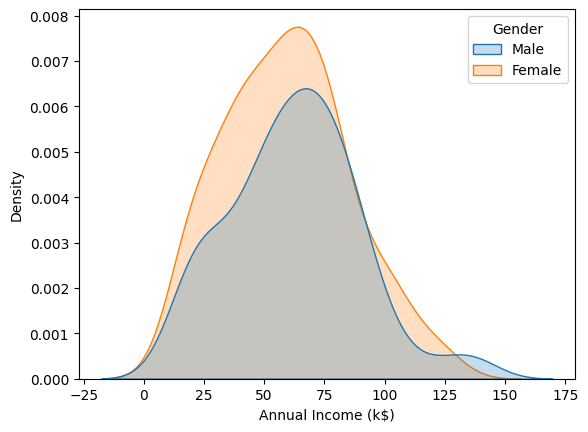

In [75]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)


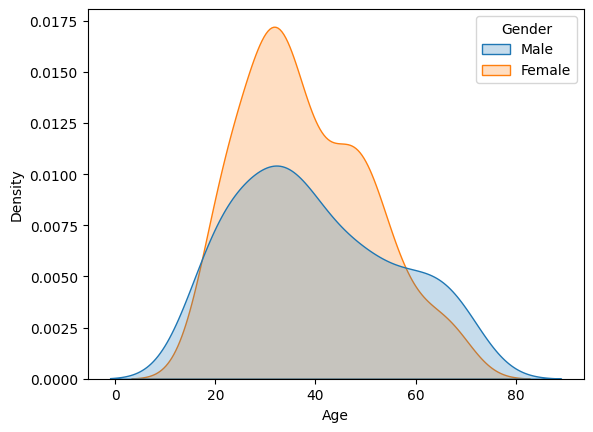

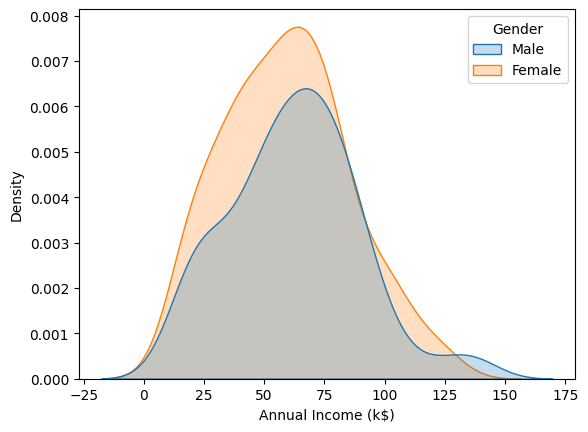

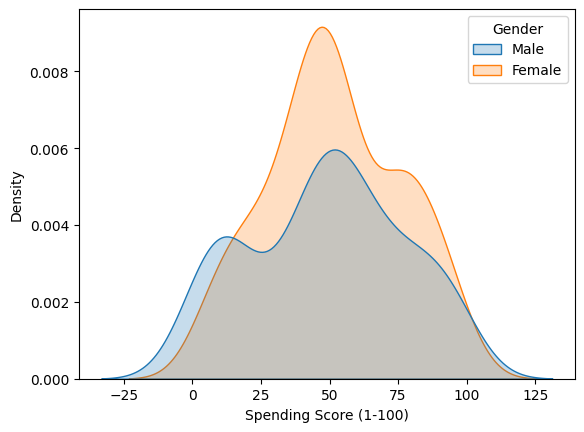

In [76]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    pyplot.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)


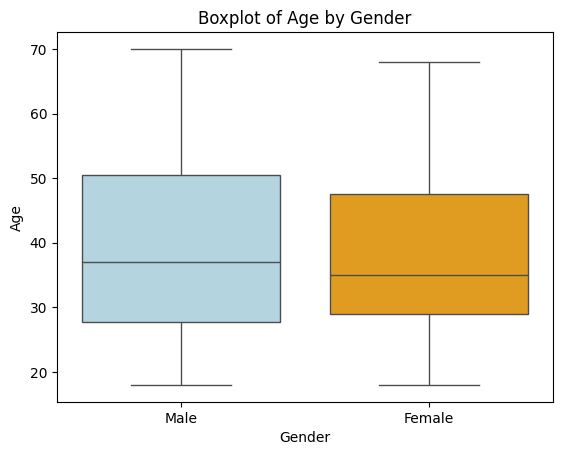

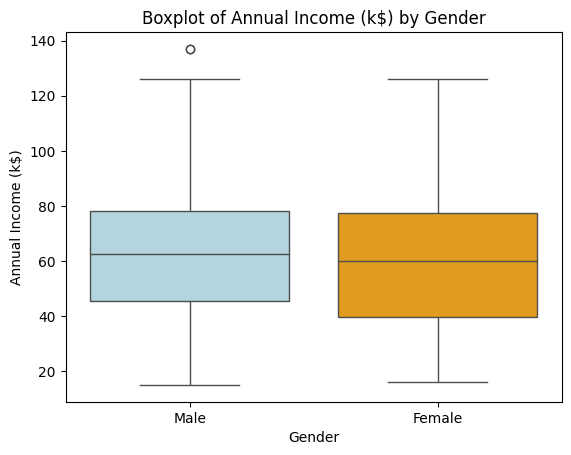

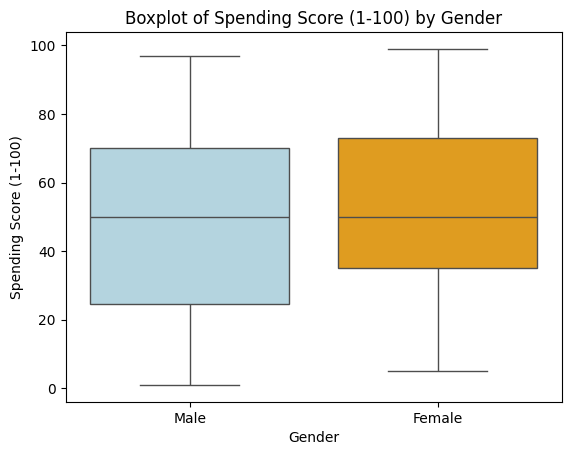

In [77]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
custom_palette = {'Male': 'lightblue', 'Female': 'orange'}

for i in columns:
    pyplot.figure()
    sns.boxplot(data=df, x='Gender', y=i, hue='Gender', palette=custom_palette, legend=False)
    pyplot.title(f'Boxplot of {i} by Gender')
    pyplot.show()


In [78]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

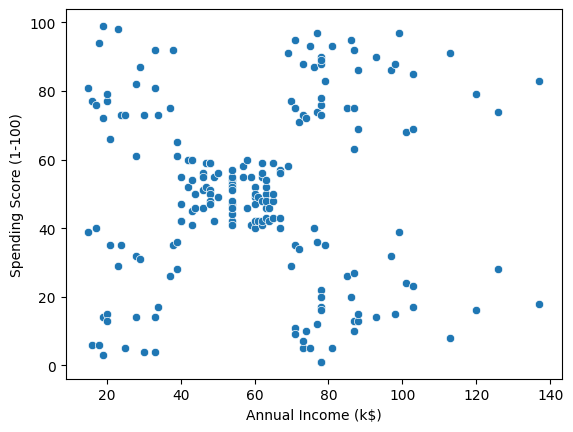

In [79]:


sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')


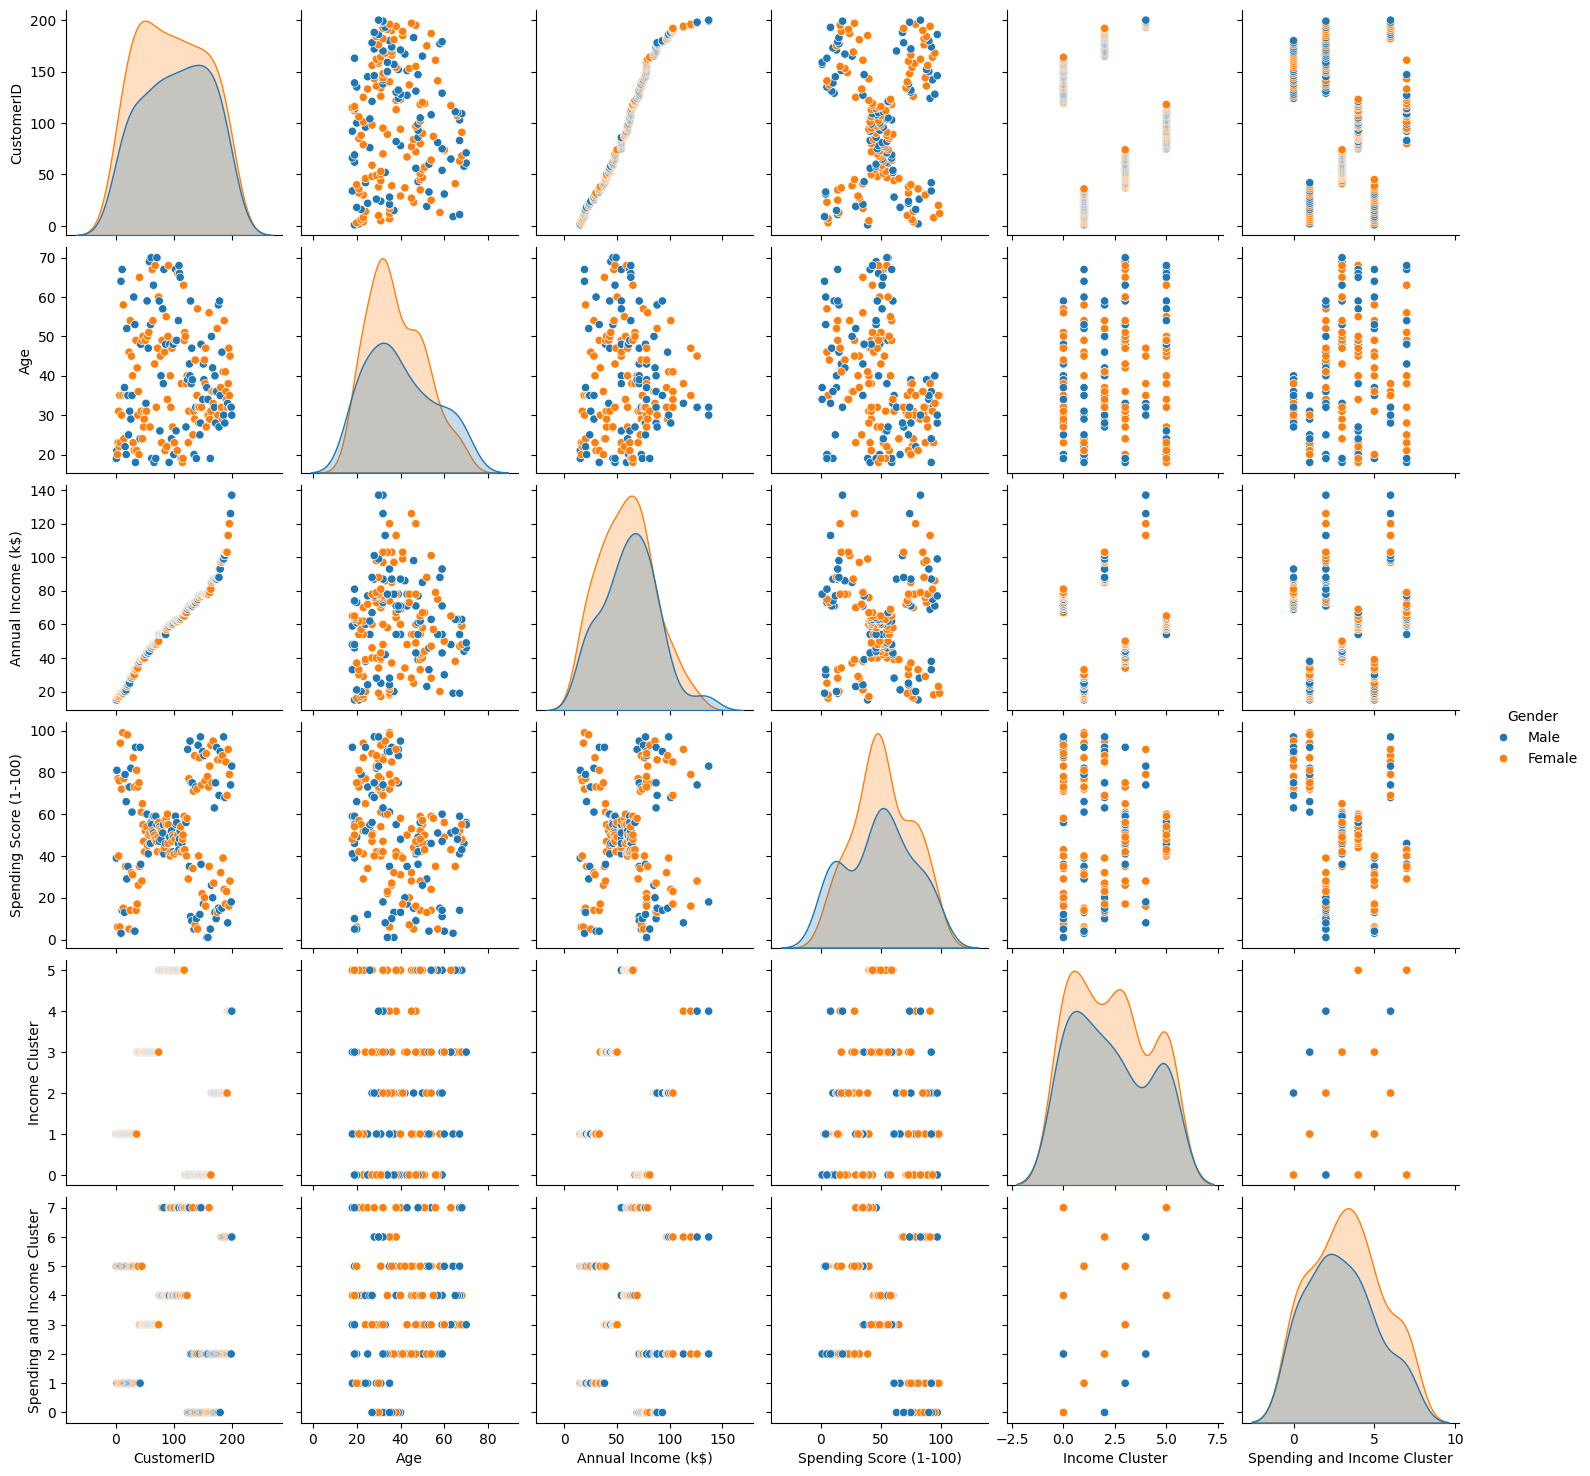

In [80]:
# df=df.drop('CustomerID', axis=1)
sns.pairplot(df,hue='Gender')

In [81]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [82]:
df.corr(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.072060,-0.117769
Age,-0.026763,1.000000,-0.012398,-0.327227,0.181008,0.213580
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.029372,-0.057961
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.018104,-0.365891
Income Cluster,-0.072060,0.181008,0.029372,-0.018104,1.000000,0.434835
Spending and Income Cluster,-0.117769,0.213580,-0.057961,-0.365891,0.434835,1.000000


<Axes: >

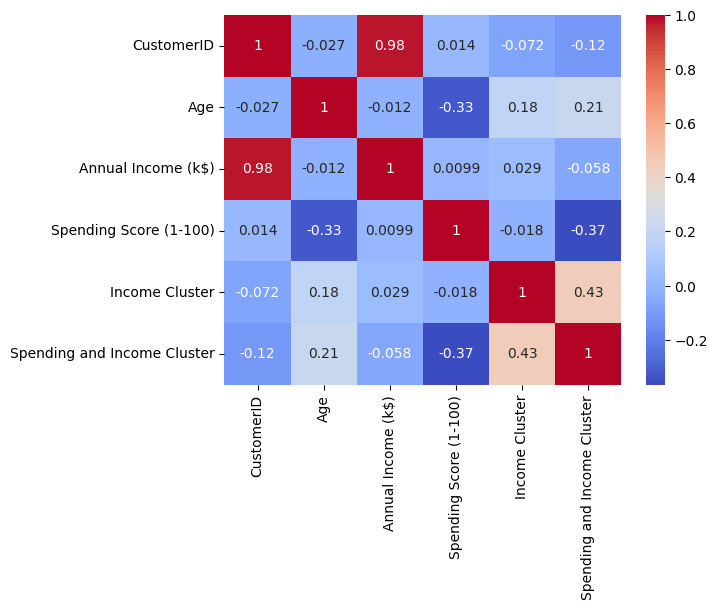

In [83]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


#clustring -  Univariate, Bivariate, Multivariate

In [84]:
clustering1 = KMeans(n_clusters=6)

In [85]:
clustering1.fit(df[['Annual Income (k$)']])

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [86]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [87]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,5
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,5
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,5


In [88]:
df['Income Cluster'].value_counts()

Income Cluster
3    54
1    50
5    42
2    32
0    16
4     6
Name: count, dtype: int64

In [89]:
clustering1.inertia_

5443.614973544974

In [90]:
inertia_scores=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(Kmeans.inertia_)

In [91]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.28587186322,
 13575.758441558448,
 10175.918627450978,
 5081.484660267269,
 6443.291172595521,
 3017.575757575758,
 2452.5837606837613,
 1761.8055555555557]

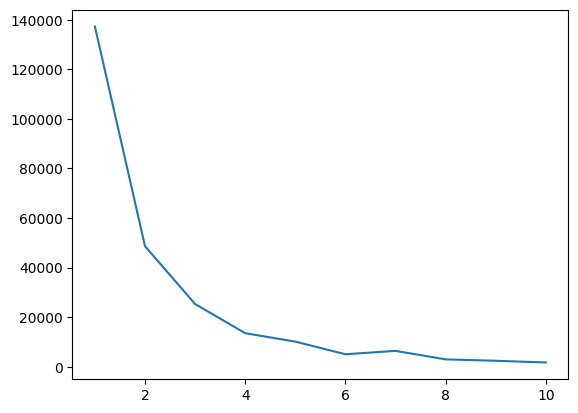

In [92]:
pyplot.plot(range(1,11),inertia_scores)

In [93]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [94]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.812500,100.875000,52.875000
1,41.520000,60.440000,50.060000
2,34.906250,22.000000,49.656250
3,36.018519,78.370370,49.555556
4,36.833333,127.666667,49.666667
5,43.000000,42.238095,50.666667


#Bivariate clustering

In [95]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


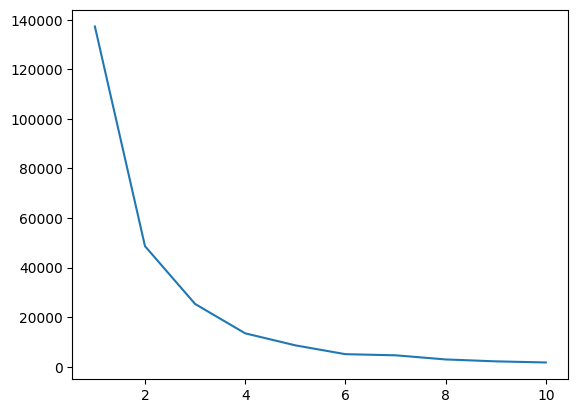

In [96]:
inertia_scores2=[]
for i in range(1,11):
    Kmeans2=KMeans(n_clusters=i)
    Kmeans2.fit(df[['Annual Income (k$)']])
    inertia_scores2.append(Kmeans2.inertia_)
pyplot.plot(range(1,11),inertia_scores2)

In [97]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']


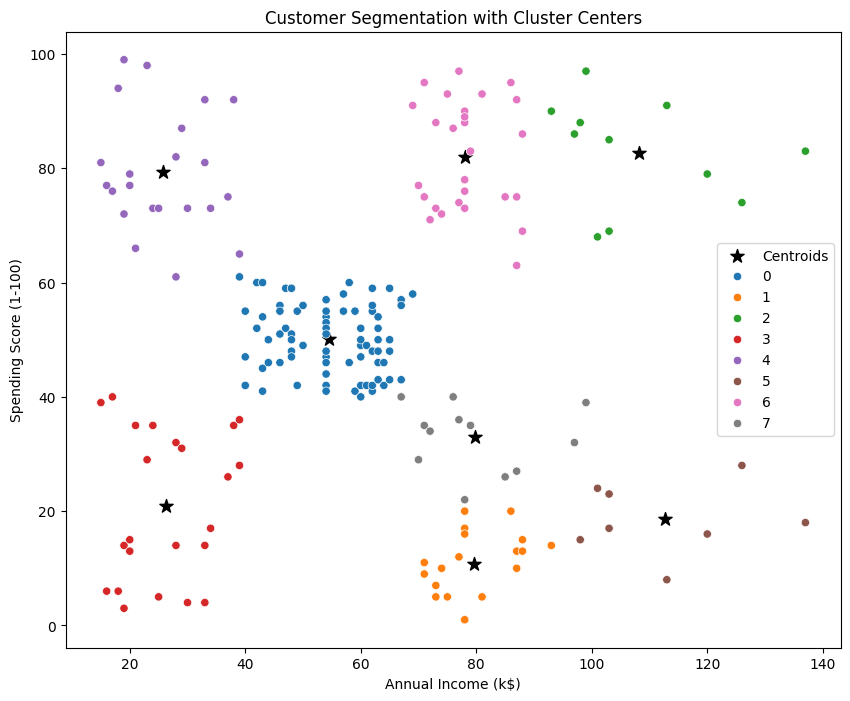

In [98]:
pyplot.figure(figsize=(10,8))
pyplot.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*', label='Centroids')

sns.scatterplot(data=df, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Spending and Income Cluster', 
                palette='tab10')

pyplot.title("Customer Segmentation with Cluster Centers")
pyplot.legend()
pyplot.show()


In [99]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,45,32
1,5,14
2,6,5
3,14,9
4,13,9
5,5,3
6,15,13
7,9,3


In [100]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,43.194805,54.454545,50.155844
1,41.157895,79.684211,10.736842
2,32.454545,108.181818,82.727273
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636
5,41.500000,112.625000,18.625000
6,32.785714,78.035714,81.892857
7,38.250000,79.833333,32.916667


In [102]:
#Multivariate clustering
from sklearn.preprocessing import StandardScaler

In [104]:
scale=StandardScaler()

In [105]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


In [108]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,3,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,3,False


In [109]:
dff.columns


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [111]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
        'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [113]:
dff =pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


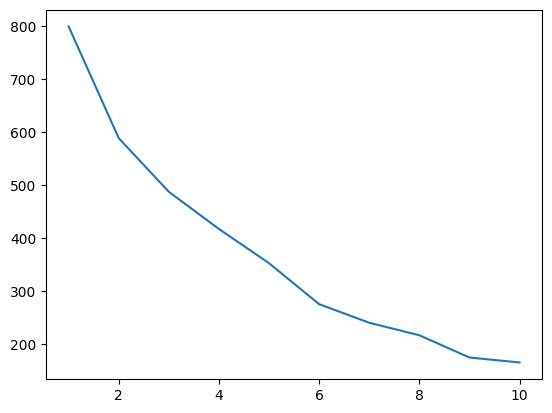

In [115]:
inertia_scores3=[]
for i in range(1,11):
    Kmeans3=KMeans(n_clusters=i)
    Kmeans3.fit(dff)
    inertia_scores3.append(Kmeans3.inertia_)
pyplot.plot(range(1,11),inertia_scores3)

In [116]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,2
196,197,Female,45,126,28,4,5
197,198,Male,32,126,74,4,2
198,199,Male,32,137,18,4,5


In [117]:
df.to_csv('clustering.csv')